In [ ]:
#!pip install sklearn

https://www.kaggle.com/code/bdcox83/super-hero-recommender-based-on-powers

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import ipywidgets as widgets
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
diretorio = "/input"
lista_arquivos = os.listdir('.'+diretorio)
for file in os.listdir('.'+diretorio):
    if file.endswith(".csv"):
        print(os.path.join('.'+diretorio, file))

#powers = pd.read_csv('./input/super_hero_powers.csv')
#heroes = pd.read_csv('./input/heroes_information.csv')

./input\heroes_information.csv
./input\super_hero_powers.csv


In [2]:
df1 = pd.read_csv('./input\super_hero_powers.csv')

In [3]:
df1['names']=df1['hero_names']
df1=df1.drop(columns='hero_names')
df1.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,names
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,3-D Man
1,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,A-Bomb
2,True,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Abe Sapien
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Abin Sur
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Abomination


In [4]:
# Convert True/False labels to 0,1
df1*=1
print(df1.shape)
df1.head()

(667, 168)


,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,names
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3-D Man
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A-Bomb
2,1,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Abe Sapien
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Abin Sur
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Abomination


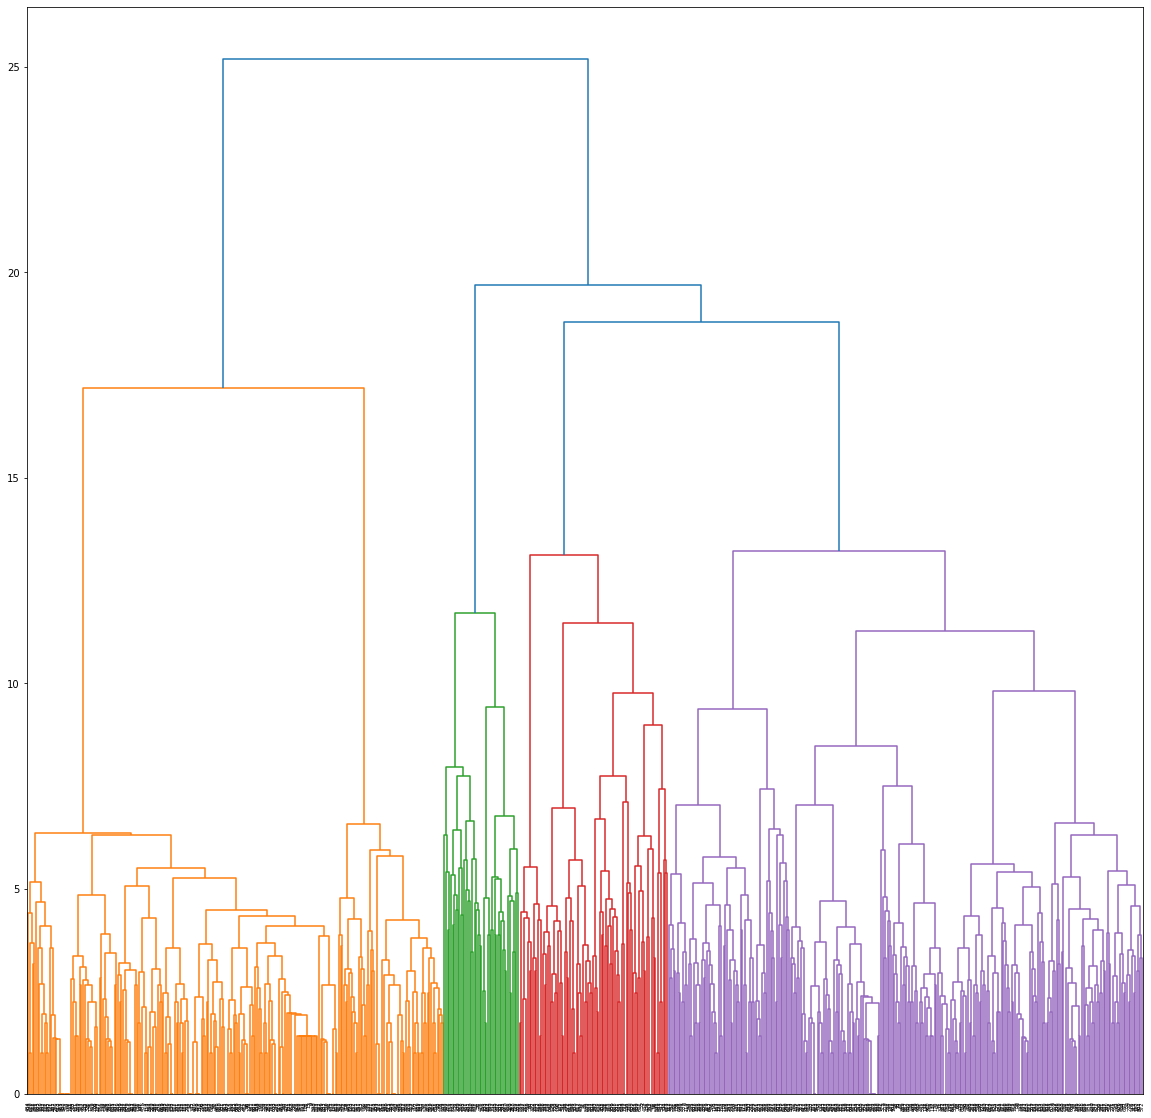

In [5]:
# Optimize number of clusters by KMeans distortion, normalized mutual information score, and adjusted rand score
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq
import scipy.cluster.hierarchy as shc

df = np.array(df1.drop(columns='names').astype(float))

plt.figure(figsize=(20,20))
dend=shc.dendrogram(shc.linkage(df, method='ward'))
# Best separation occurs at k~40

In [6]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=40, affinity='euclidean', linkage='ward')
cluster.fit_predict(df)

array([10, 17, 18, 15,  9,  4, 29, 15, 11, 15,  7, 28, 28, 12, 35, 15,  2,
       15, 14, 15, 15, 19, 10, 39, 15, 34, 10, 15, 11, 32, 17,  2,  8, 24,
        0, 18,  2, 17, 17,  7, 10, 34, 34, 28,  9, 28, 15, 23, 15, 33, 28,
       15, 28,  4, 28, 10,  7, 17,  3, 30, 30,  0,  3, 10,  3, 15, 25, 39,
       15,  9,  8,  9, 24, 15, 28, 15,  7, 10, 39, 39, 15, 11,  9, 13, 13,
       34,  9, 10,  3, 10, 25, 15,  7, 15,  0,  3, 15,  3, 10, 34, 24, 25,
       24, 15, 15, 15, 24, 10, 39,  7,  7, 33,  7, 15, 11, 15,  7, 11, 15,
       15,  9, 33, 33, 30, 10, 15, 11, 34, 15,  1, 25, 15, 15,  3, 32, 10,
       15, 28, 28,  6, 24, 15,  4,  7,  2, 10,  3, 15, 15, 34, 15, 34, 30,
       10, 25, 10, 15, 10, 15, 23, 15, 15, 29, 24, 15, 24,  7,  7, 10, 33,
       28, 10, 13,  7, 15, 15, 34,  3,  7, 24,  8,  7, 26, 26, 10, 19,  5,
        4, 22,  3, 10, 19, 24, 10, 15, 15, 17,  7,  7, 12, 10, 33, 12, 10,
        3, 28, 29, 10,  4, 32, 19, 28, 23, 15,  3, 15, 23,  1, 17, 15,  3,
       17, 22,  7, 12, 15

C:\Users\F8050751\OneDrive - TIM\python_projects\github\superhero\venv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\F8050751\OneDrive - TIM\python_projects\github\superhero\venv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 67 nearest neighbors...
[t-SNE] Indexed 667 samples in 0.001s...
[t-SNE] Computed neighbors for 667 samples in 0.032s...
[t-SNE] Computed conditional probabilities for sample 667 / 667
[t-SNE] Mean sigma: 0.324470
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.090111
[t-SNE] KL divergence after 1950 iterations: 1.224175


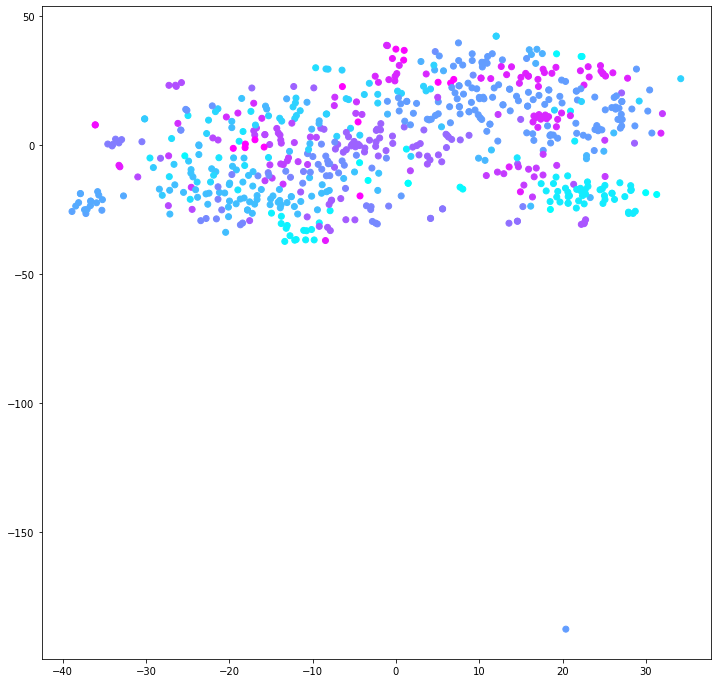

In [7]:
from sklearn.manifold import TSNE
np.random.seed(777)
tsne=TSNE(n_components=2, verbose=1, perplexity=22, n_iter=10000) # perplexity determined by 667 entries / 40 clusters ~ 22
results=tsne.fit_transform(df)
plt.figure(figsize=(12,12))
plt.scatter(results[:,0], results[:,1], c=cluster.labels_, cmap='cool')


In [8]:
df1['clusters'] = cluster.labels_
df1['clusters'].value_counts()

15    132
10     57
3      46
24     43
7      40
34     28
17     27
33     26
28     24
9      22
30     17
2      17
13     14
19     13
25     13
11     12
39     11
23     11
12     10
29      9
18      8
20      7
1       7
8       7
4       7
5       7
0       6
32      5
26      5
31      5
6       4
27      4
35      4
21      4
14      3
22      3
38      3
16      3
37      2
36      1
Name: clusters, dtype: int64

In [9]:
print(df1.loc[df1['clusters']==36]['names'])
print(df1.loc[df1['clusters']==36][df1==1].dropna(axis=1).columns.values)


563    Spectre
Name: names, dtype: object
['Agility' 'Accelerated Healing' 'Dimensional Awareness' 'Stealth'
 'Energy Absorption' 'Flight' 'Marksmanship' 'Longevity' 'Intelligence'
 'Super Strength' 'Telepathy' 'Energy Blasts' 'Duplication'
 'Size Changing' 'Density Control' 'Stamina' 'Super Speed' 'Possession'
 'Electrokinesis' 'Darkforce Manipulation' 'Death Touch' 'Teleportation'
 'Magic' 'Immortality' 'Phasing' 'Astral Projection' 'Fire Control'
 'Invulnerability' 'Energy Constructs' 'Force Fields' 'Psionic Powers'
 'Elasticity' 'Animation' 'Precognition' 'Hypnokinesis' 'Animal Control'
 'Heat Generation' 'Gravity Control' 'Light Control' 'Levitation'
 'Time Travel' 'Illusions' 'Water Control' 'Omnilingualism'
 'Time Manipulation' 'Invisibility' 'Sub-Mariner' 'Vision - Heat'
 'Reality Warping']


In [10]:
df2 = df1.loc[(df1['clusters'] != 36) & (df1['clusters'] != 37)] # These clusters have < 3 entries
df2['clusters'].value_counts()


15    132
10     57
3      46
24     43
7      40
34     28
17     27
33     26
28     24
9      22
30     17
2      17
13     14
25     13
19     13
11     12
23     11
39     11
12     10
29      9
18      8
1       7
4       7
20      7
8       7
5       7
0       6
26      5
31      5
32      5
6       4
35      4
27      4
21      4
22      3
14      3
38      3
16      3
Name: clusters, dtype: int64

In [16]:
#Run this cell, select an entry from the drop down menu, then run the next cell
import random
a=[36,37]
c=[]
for i in range(15):
    b = random.randint(0,39)
    while b in a: 
        b = random.randint(0,39)
    c.append(b)
    a.append(b)
e=[]
for i in c:
    df_temp=df2.loc[df2['clusters']==i]
    df_temp=df_temp.reset_index(drop=True)
    d = random.randint(0,len(df_temp)-1)
    e.append(df_temp.iloc[d,:]['names'])

print("Select your favorite hero")
dd = widgets.Dropdown(options=e, disabled=False)
dd


Select your favorite hero


Dropdown(options=('Deadpool', 'Juggernaut', 'Professor X', 'Blue Beetle', 'Man of Miracles', 'Doctor Fate', 'J…

In [19]:
df2_temp=df2.loc[df2['names']==dd.value]
#print(dd.value+" has the following powers:")
#print(df2_temp.dropna(axis=1).drop(columns=['names', 'clusters']).columns.values)

v = df2_temp['clusters'].values
df3_temp = df2.loc[df2['clusters'].isin(v)].reset_index(drop=True)
np.random.seed()
aa=[dd.value]
cc=[]
for i in range(2):
    bb = random.randint(0,len(df3_temp)-1)
    while df3_temp.iloc[bb,:]['names'] in aa:
        bb = random.randint(0,len(df3_temp)-1)
    aa.append(df3_temp.iloc[bb,:]['names'])
    cc.append(df3_temp.iloc[bb,:]['names'])

print("If you like", dd.value+", then you may also like", cc[0], "or", cc[1]+".")

If you like Professor X, then you may also like Matt Parkman or Black Abbott.
